In [2]:
from google.colab import drive
drive.mount('/drive')
 
#Optional: move to the desired location:
%cd /drive/My Drive/500

Mounted at /drive
/drive/My Drive/500


In [3]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [4]:
def get_denoising(image):
    

    # resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img

In [5]:
def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [   
            
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur

In [6]:
imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))

In [7]:
data_hsv = []
# labels = pd.DataFrame(columns=['label'])
data_glcm =[]
labels=[]

# image_fitur.append(fitur)


In [8]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    features_glcm = get_denoising(resizing)
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    data_glcm.append(features_glcm)
 
    features_hsv = get_denoising(resizing)
    
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    
    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv"
    try:
      with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_hsv:
          writer.writerow(data)
    except IOError:
        print("I/O error")
 
        
    label = imagePath.split(os.path.sep)[-2]
 
    labels.append(label)
 
#     labels.loc[len(labels)] = label
    if  i > 0 and i % 1 == 0:
 
        print("{}/{}".format(i, len(imagePaths)))

{'mean_h': 9.618522799744898, 'mean_s': 119.83041693239795, 'mean_v': 152.78045280612244, 'std_h': 5.615590814004203, 'std_s': 31.885444347820016, 'std_v': 42.84428226591853, 'var_h': 31.53486019032838, 'var_s': 1016.6815612579275, 'var_v': 1835.632522881701, 'skew_h': 19.96409455462799, 'skew_s': -0.3113348817120624, 'skew_v': -1.064526342377438, 'kurt_h': 573.4256327039847, 'kurt_s': 3.0218601824378277, 'kurt_v': 2.8677032949646195}
{'mean_h': 25.81118463010204, 'mean_s': 98.05980947066327, 'mean_v': 157.40160634566325, 'std_h': 51.441943396429906, 'std_s': 25.210099906037108, 'std_v': 70.00828324125486, 'var_h': 2646.2735404014984, 'var_s': 635.5491372723721, 'var_v': 4901.159722387766, 'skew_h': 2.555142733059937, 'skew_s': 0.10063651021373841, 'skew_v': -0.3320324569483176, 'kurt_h': 7.612541731514433, 'kurt_s': 3.735051922155021, 'kurt_v': 1.336093367922426}
1/225
{'mean_h': 9.62093431122449, 'mean_s': 99.4898756377551, 'mean_v': 162.6493542729592, 'std_h': 14.912566829554866, 's

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv")

hsv_df.head()

mean_h      mean_s      mean_v  ...      kurt_h    kurt_s     kurt_v
0   9.618523  119.830417  152.780453  ...  573.425633  3.021860   2.867703
1  25.811185   98.059809  157.401606  ...    7.612542  3.735052   1.336093
2   9.620934   99.489876  162.649354  ...  115.710962  2.101487   3.072661
3   8.853197  101.999562  150.346919  ...  539.405946  3.355420   2.226917
4  10.885264   95.707809  179.391821  ...    2.105885  2.119462  46.143659

[5 rows x 15 columns]

In [10]:
print(hsv_df)

        mean_h      mean_s      mean_v  ...      kurt_h     kurt_s     kurt_v
0     9.618523  119.830417  152.780453  ...  573.425633   3.021860   2.867703
1    25.811185   98.059809  157.401606  ...    7.612542   3.735052   1.336093
2     9.620934   99.489876  162.649354  ...  115.710962   2.101487   3.072661
3     8.853197  101.999562  150.346919  ...  539.405946   3.355420   2.226917
4    10.885264   95.707809  179.391821  ...    2.105885   2.119462  46.143659
..         ...         ...         ...  ...         ...        ...        ...
220  14.114059   23.215661  122.562420  ...  392.755902   6.455269   4.036007
221  14.109315   18.560886  162.417391  ...   68.789260   4.249260   2.942508
222  55.918208    5.526965  165.593431  ...    1.904908  32.168832   8.165772
223  16.193379   12.476582  136.585220  ...   22.760410   3.649675   2.938105
224  43.152324   14.178073  141.674007  ...    2.919959   3.866779   2.089252

[225 rows x 15 columns]


In [11]:
# hsv_df.drop('Unnamed: 0', axis=1)


In [12]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[2], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls = []
for img, label in zip(data_glcm, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")
# columns.loc[len(labels)] = label

In [13]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("/drive/My Drive/TA/dobel/glcm_hsv.csv", index=False)

glcm_df.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0    137.369993   105.650104  ...         0.189259  Melanoma
1    189.715573   151.401275  ...         0.266378  Melanoma
2     99.682412    87.796779  ...         0.181584  Melanoma
3    157.655667   137.928955  ...         0.157580  Melanoma
4     27.872285    26.952000  ...         0.241103  Melanoma
..          ...          ...  ...              ...       ...
220   60.928471    55.609624  ...         0.203665    Normal
221   42.084198    38.010678  ...         0.210116    Normal
222   55.253881    49.373484  ...         0.240200    Normal
223   21.149855    17.600314  ...         0.283320    Normal
224   29.813787    24.091516  ...         0.248373    Normal

[225 rows x 17 columns]

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glcm_df = pd.read_csv("/drive/My Drive/TA/dobel/glcm_hsv.csv")
# glcm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glcm_df.head(120)

contrast_0  contrast_45  ...  homogeneity_135     label
0    137.369993   105.650104  ...         0.189259  Melanoma
1    189.715573   151.401275  ...         0.266378  Melanoma
2     99.682412    87.796779  ...         0.181584  Melanoma
3    157.655667   137.928955  ...         0.157580  Melanoma
4     27.872285    26.952000  ...         0.241103  Melanoma
..          ...          ...  ...              ...       ...
115   75.577180    64.713326  ...         0.265804       Bcc
116   13.862492     8.992540  ...         0.450242       Bcc
117  134.961913    97.977719  ...         0.229735       Bcc
118  230.300374   184.844497  ...         0.156821       Bcc
119   12.996018     8.272839  ...         0.451253       Bcc

[120 rows x 17 columns]

In [15]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/glcm_hsv.csv')
result = pd.merge(df1, df2, left_index=True, right_index=True)
result.to_csv('/drive/My Drive/TA/dobel/merged_hsv_glcm.csv', index=False)


result = pd.read_csv("/drive/My Drive/TA/dobel/merged_hsv_glcm.csv")




result.head(1000)

mean_h      mean_s  ...  homogeneity_135     label
0     9.618523  119.830417  ...         0.189259  Melanoma
1    25.811185   98.059809  ...         0.266378  Melanoma
2     9.620934   99.489876  ...         0.181584  Melanoma
3     8.853197  101.999562  ...         0.157580  Melanoma
4    10.885264   95.707809  ...         0.241103  Melanoma
..         ...         ...  ...              ...       ...
220  14.114059   23.215661  ...         0.203665    Normal
221  14.109315   18.560886  ...         0.210116    Normal
222  55.918208    5.526965  ...         0.240200    Normal
223  16.193379   12.476582  ...         0.283320    Normal
224  43.152324   14.178073  ...         0.248373    Normal

[225 rows x 32 columns]

In [16]:
# result.drop('label', axis=1, inplace=True)
# result.head(1000)

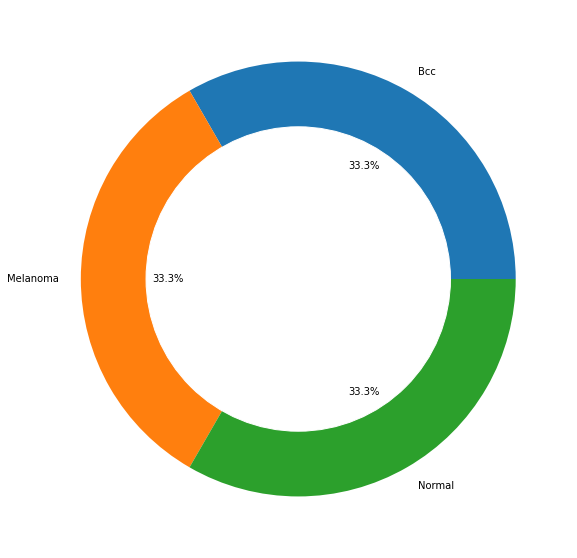

In [17]:
label_distr = result['label'].value_counts()

label_name = ['Bcc', 'Melanoma', 'Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
print(label_distr)

Normal      75
Bcc         75
Melanoma    75
Name: label, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(X.values)



X = decimal_scaling(
            result[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v',
                    'contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
                    'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
                    'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
                    'contrast_135', 'correlation_135', 'energy_135','homogeneity_135'
                   ]].values
                    )

# ,
#                     'ASM_0','ASM_45','ASM_90','ASM_135', 'dissimilarity_0','dissimilarity_45',
#                      'dissimilarity_90','dissimilarity_135'

In [20]:
le = LabelEncoder()
le.fit(result["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(result['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [22]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
    #  fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    #  fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    #  tp = np.diag(cnf_matrix)
    #  tn = cnf_matrix.sum() - (fp + fn + tp)
 
    #  fp = fp.astype(float)
    #  fn = fn.astype(float)
    #  tp = tp.astype(float)
    #  tn = tn.astype(float)
     FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
     FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     TP = np.diag(cnf_matrix)
     TN = cnf_matrix.sum() - (FP + FN + TP)
     FP = FP.astype(float)
     FN = FN.astype(float)
     TP = TP.astype(float)
     TN = TN.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[TP,FP],[FN,TN]]))
     print('sensitivity is %f',1.*TP/(TP+FN))
     print('specificity is %f',1.*TN/(TN+FP))
     print('accuracy is %f',1.*(TP+TN)/(TP+TN+FP+FN))
    #  print('balanced accuracy is %',1./2*(1.*TP/(tp+fn)+1.*tn/(tn+fp)))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 44ms/step - loss: 1.0942 - accuracy: 0.4333 - val_loss: 1.0891 - val_accuracy: 0.4222
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0734 - accuracy: 0.4667 - val_loss: 1.0787 - val_accuracy: 0.3556
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0453 - accuracy: 0.4889 - val_loss: 1.0486 - val_accuracy: 0.4222
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0001 - accuracy: 0.6111 - val_loss: 0.9827 - val_accuracy: 0.6889
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9283 - accuracy: 0.6944 - val_loss: 0.9082 - val_accuracy: 0.7111
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8391 - accuracy: 0.7222 - val_loss: 0.7842 - val_accuracy: 0.7333
Epoch 7/100
6/6 [=============================

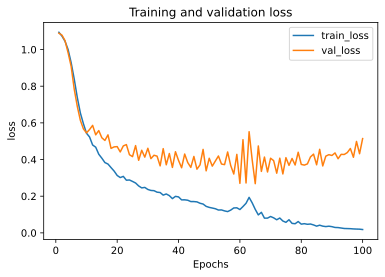

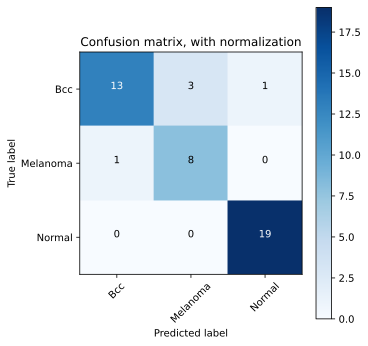

              precision    recall  f1-score   support

         Bcc       0.93      0.76      0.84        17
    Melanoma       0.73      0.89      0.80         9
      Normal       0.95      1.00      0.97        19

    accuracy                           0.89        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.90      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[13.  8. 19.]
  [ 1.  3.  1.]]

 [[ 4.  1.  0.]
  [27. 33. 25.]]]
sensitivity is %f [0.76 0.89 1.  ]
specificity is %f [0.96 0.92 0.96]
accuracy is %f [0.89 0.91 0.98]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 1.0990 - accuracy: 0.3056 - val_loss: 1.1001 - val_accuracy: 0.2000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0830 - accuracy: 0.3833 - val_loss: 1.0912 - val_accuracy: 0.3111
Epoch 3/100


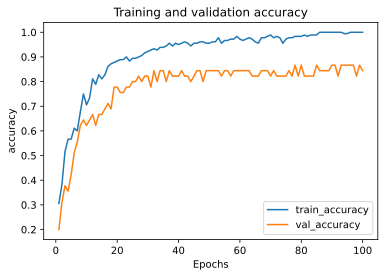

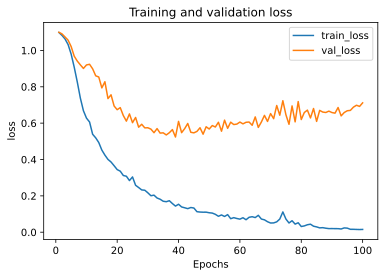

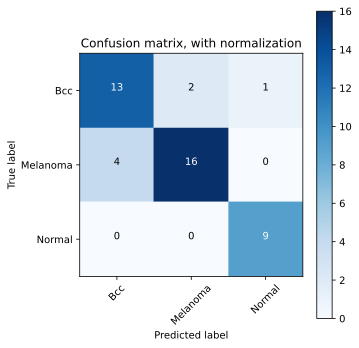

              precision    recall  f1-score   support

         Bcc       0.76      0.81      0.79        16
    Melanoma       0.89      0.80      0.84        20
      Normal       0.90      1.00      0.95         9

    accuracy                           0.84        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.85      0.84      0.84        45

Deep Neural Network
confusion matrix
[[[13. 16.  9.]
  [ 4.  2.  1.]]

 [[ 3.  4.  0.]
  [25. 23. 35.]]]
sensitivity is %f [0.81 0.8  1.  ]
specificity is %f [0.86 0.92 0.97]
accuracy is %f [0.84 0.87 0.98]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 1.0992 - accuracy: 0.3556 - val_loss: 1.0795 - val_accuracy: 0.4444
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0736 - accuracy: 0.6556 - val_loss: 1.0515 - val_accuracy: 0.7333
Epoch 3/100


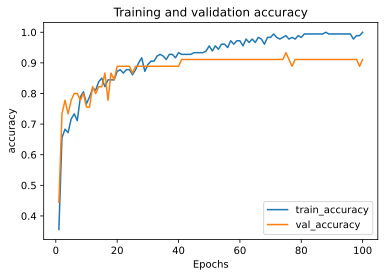

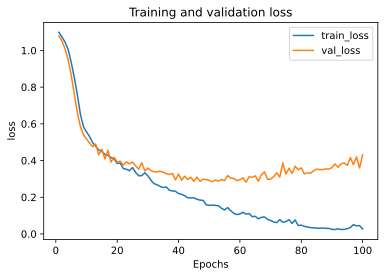

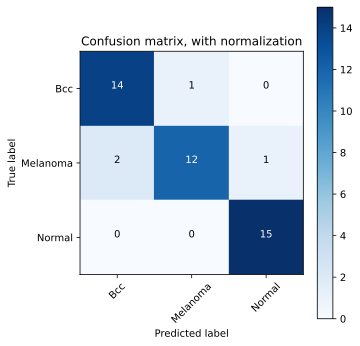

              precision    recall  f1-score   support

         Bcc       0.88      0.93      0.90        15
    Melanoma       0.92      0.80      0.86        15
      Normal       0.94      1.00      0.97        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

Deep Neural Network
confusion matrix
[[[14. 12. 15.]
  [ 2.  1.  1.]]

 [[ 1.  3.  0.]
  [28. 29. 29.]]]
sensitivity is %f [0.93 0.8  1.  ]
specificity is %f [0.93 0.97 0.97]
accuracy is %f [0.93 0.91 0.98]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 79ms/step - loss: 1.0908 - accuracy: 0.4389 - val_loss: 1.0770 - val_accuracy: 0.5111
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0637 - accuracy: 0.5444 - val_loss: 1.0518 - val_accuracy: 0.5111
Epoch 3/100


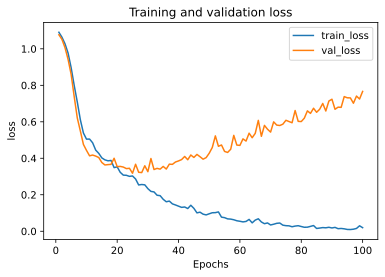

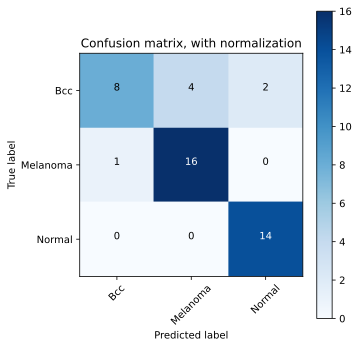

              precision    recall  f1-score   support

         Bcc       0.89      0.57      0.70        14
    Melanoma       0.80      0.94      0.86        17
      Normal       0.88      1.00      0.93        14

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.83        45
weighted avg       0.85      0.84      0.83        45

Deep Neural Network
confusion matrix
[[[ 8. 16. 14.]
  [ 1.  4.  2.]]

 [[ 6.  1.  0.]
  [30. 24. 29.]]]
sensitivity is %f [0.57 0.94 1.  ]
specificity is %f [0.97 0.86 0.94]
accuracy is %f [0.84 0.89 0.96]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 1.0943 - accuracy: 0.4111 - val_loss: 1.0799 - val_accuracy: 0.6444
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0700 - accuracy: 0.6444 - val_loss: 1.0623 - val_accuracy: 0.5333
Epoch 3/100


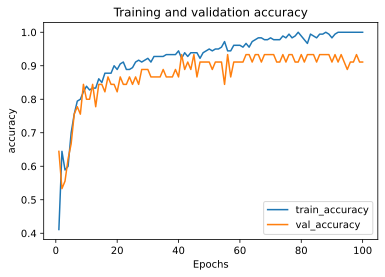

              precision    recall  f1-score   support

         Bcc       0.76      1.00      0.87        13
    Melanoma       1.00      0.86      0.92        14
      Normal       1.00      0.89      0.94        18

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45

Deep Neural Network
confusion matrix
[[[13. 12. 16.]
  [ 4.  0.  0.]]

 [[ 0.  2.  2.]
  [28. 31. 27.]]]
sensitivity is %f [1.   0.86 0.89]
specificity is %f [0.88 1.   1.  ]
accuracy is %f [0.91 0.96 0.96]




Rata-Rata Akurasi
88.00% (+/- 3.01%)


In [23]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(31, input_dim=31, activation='relu'))
  

  # model.add(Dropout(0.3))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.3))



 
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
 





  # model.add(Dropout(0.2))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.2))






  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)


  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")


  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  y_pred=model.predict(X[val_index])
  y_pred1=model.predict(X[train_index])

  # y_pred=model.predict(x_val_kf)
  # y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma', 'Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',  'Melanoma', 'Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




save_model_path = "/drive/My Drive/Moddel/modelku3.h5"
model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [24]:
# %cd /drive/My Drive/Moddel/

In [25]:
cvscores

[88.88888955116272,
 84.44444537162781,
 91.11111164093018,
 84.44444537162781,
 91.11111164093018]

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[13  0  0]
 [ 2 12  0]
 [ 2  0 16]]


In [27]:
cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

[[13  0  0]
 [ 2 12  0]
 [ 2  0 16]]


In [28]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TN)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

[1.   0.86 0.89]
[28. 31. 27.]


In [29]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cnf_matrix,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

In [30]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [31]:

from sklearn.metrics import recall_score

# calculate recall
recall = recall_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), labels=[0,1,2], average='micro', pos_label=1)
print('Recall: %.3f' % recall)

Recall: 0.911


In [32]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(y_val_kf.argmax(axis=1)==l,
                                                      y_pred.argmax(axis=1)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])


In [33]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

class  sensitivity  specificity
0      0        0.875     1.000000
1      1        1.000     0.857143
2      2        1.000     0.888889

In [34]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
mcm

array([[[28,  4],
        [ 0, 13]],

       [[31,  0],
        [ 2, 12]],

       [[27,  0],
        [ 2, 16]]])

In [35]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
multilabel_confusion_matrix(y_true, y_pred,
                            labels=["ant", "bird", "cat"])

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

In [36]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred,
                            labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [37]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]

Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.78
Macro Recall: 0.79
Macro F1-score: 0.78

Weighted Precision: 0.84
Weighted Recall: 0.82
Weighted F1-score: 0.83

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      0.94      0.97        16
     Class 2       0.85      0.81      0.83        21
     Class 3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



In [38]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
    #  fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    #  fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    #  tp = np.diag(cnf_matrix)
    #  tn = cnf_matrix.sum() - (fp + fn + tp)
 
    #  fp = fp.astype(float)
    #  fn = fn.astype(float)
    #  tp = tp.astype(float)
    #  tn = tn.astype(float)
     FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
     FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     TP = np.diag(cnf_matrix)
     TN = cnf_matrix.sum() - (FP + FN + TP)
     FP = FP.astype(float)
     FN = FN.astype(float)
     TP = TP.astype(float)
     TN = TN.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[TP,FP],[FN,TN]]))
     print('sensitivity is %f',1.*TP/(TP+FN))
     print('specificity is %f',1.*TN/(TN+FP))
     print('accuracy is %f',1.*(TP+TN)/(TP+TN+FP+FN))
    #  print('balanced accuracy is %',1./2*(1.*TP/(tp+fn)+1.*tn/(tn+fp)))
print('Deep Neural Network')
display_summary(y_test, y_pred)

Deep Neural Network
confusion matrix
[[[15. 17.  5.]
  [ 0.  3.  5.]]

 [[ 1.  4.  3.]
  [29. 21. 32.]]]
sensitivity is %f [0.94 0.81 0.62]
specificity is %f [1.   0.88 0.86]
accuracy is %f [0.98 0.84 0.82]


In [39]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[29,  0],
        [ 1, 15]],

       [[21,  3],
        [ 4, 17]],

       [[32,  5],
        [ 3,  5]]])